# Table of contents
1. [Imports](#imports)
2. [Image Filtering](#filtering)
    1. [Convolving Images with Filters](#convolving)
    2. [Smoothing with Box Filter](#boxfilter)
    3. [Gaussian Smoothing](#gaussian) 
    4. [Median Filter](#median)
3. [Image Gradients and Edge Detection](#imagegradient)
    1. [Sobel and Laplacian Edge Detectors](#sobelLaplacian)
    2. [Canny Edge Detector](#canny)
    3. [Difference of Gaussian](#dog)
    4. [Blob Detection](#blob)


## Imports <a name="imports"></a>

In [1]:
import cv2
import os
import sys
from skimage import io, data
import numpy as np
import matplotlib.pyplot as plt

## Image Filtering <a name="filtering"></a>

### Convolving Images with Filters <a name="convolving"></a>

Convolution is an important operation in signal and image processing. Convolution operates on two signals (in 1D) or two images (in 2D): you can think of one as the "input" as image, and the other (called the kernel) as a "filter" on the input image, producing an output image.

An example of convolution with box filter is given below (source: https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html):


![Alt Text](https://ai.stanford.edu/~syyeung/cvweb/gifs/moving%20average.gif)





In [2]:
def myConvolve2d(image, kernel):
    """
    In this function convolution operation is implemented from scratch
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    """
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    
    # Loop over every pixel of the image and implement convolution operation (element wise multiplication and summation). 
    # You can use two loops. The result is stored in the variable output.
    
    for x in range(image.shape[0]):     # Loop over every pixel of the image
        for y in range(image.shape[1]):
            # element-wise multiplication and summation 
            output[x,y]=((kernel*image_padded[x:x+3,y:y+3]).sum())
        
    
    return output

def show(img):
    io.imshow(img)
    plt.show()

This function which takes an image and a kernel and returns the convolution of them. Necessary padding is provided within the image

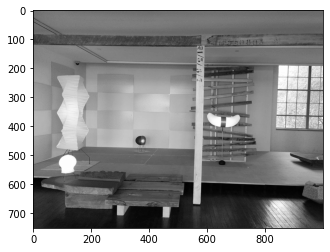

In [3]:
img = io.imread("../inputs/image1.jpg",1) #in skimage 1 is for grayscale 
plt.imshow(img,cmap=plt.cm.gray)

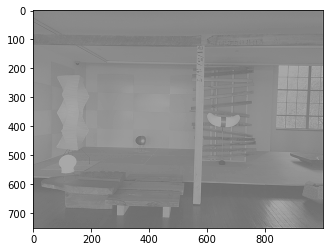

In [4]:
# Convolve the sharpen kernel (laplacian) and the image
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
#Call the function my_convolve2d
image_sharpen = myConvolve2d(img,kernel)
plt.imshow(image_sharpen,cmap=plt.cm.gray)

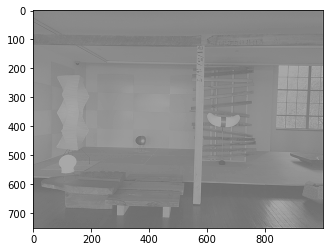

In [5]:
from scipy import signal
# Convolve the sharpen kernel (laplacian) and the image
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
f = signal.convolve2d(img,kernel, 'same')
plt.imshow(f,cmap=plt.cm.gray)

### Smoothing with Box Filter <a name="boxfilter"></a>

Alternative box filter available is cv2.boxFilter()

Text(0.5, 1.0, 'Blurred')

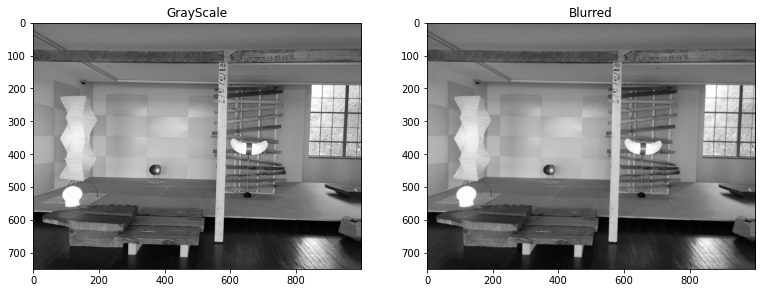

In [6]:

img = cv2.imread("../inputs/image1.jpg",0)
kernel = np.ones((3,3),np.float32)/9 #blur
f = signal.convolve2d(img,kernel, 'same')

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("Blurred")

For larger blurr use 5x5 box filter kernel

Text(0.5, 1.0, 'Blurred')

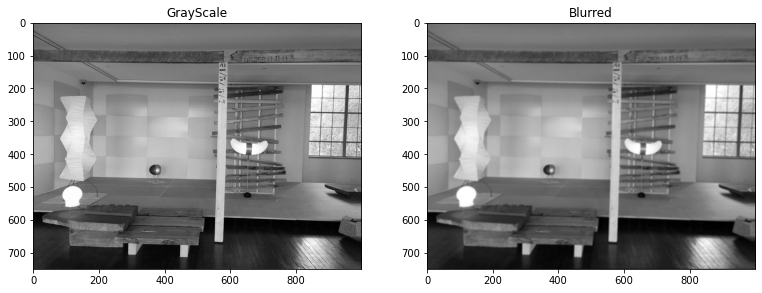

In [8]:
img = cv2.imread("../inputs/image1.jpg",0)

kernel = np.ones((5,5),np.float32)/25 #blur
f = signal.convolve2d(img,kernel, 'same')

plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("Blurred")

### Gaussian Smoothing <a name="gaussian"></a>

Exercise: Try with different Sigma values

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

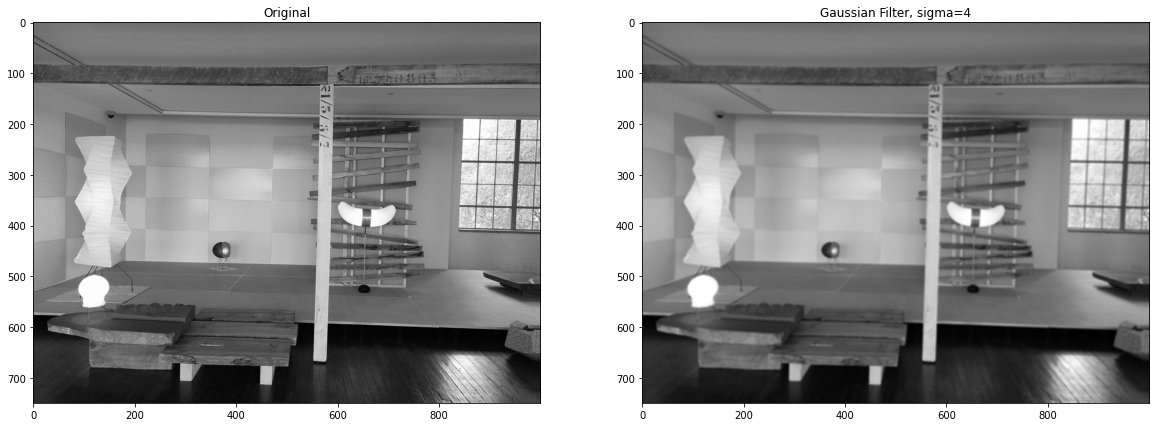

In [9]:
img = cv2.imread("../inputs/image1.jpg",0)

img_gaussianFilter = cv2.GaussianBlur(img, (5,5),sigmaX=4)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")

### Median Filter <a name="median"></a>

Text(0.5, 1.0, 'Median Filter')

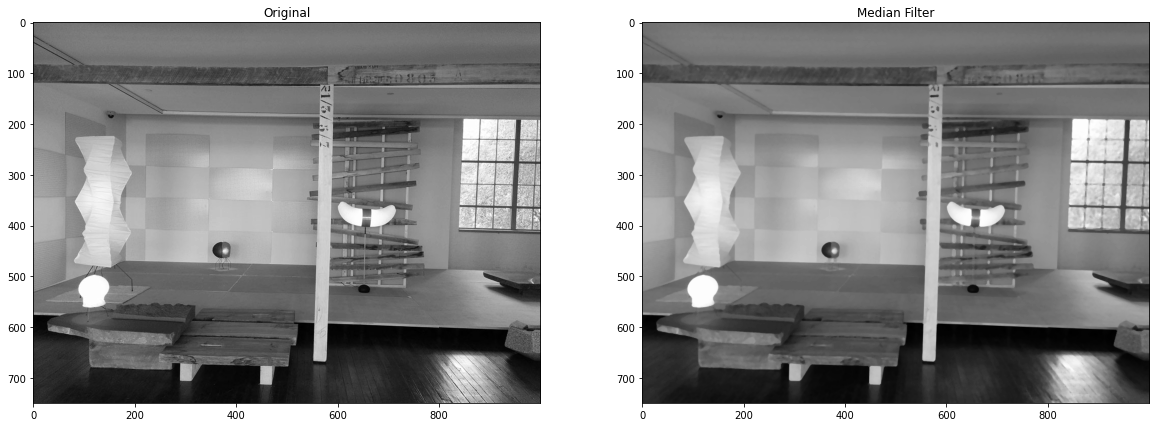

In [10]:
img = cv2.imread("../inputs/image1.jpg",0)

img_med = cv2.medianBlur(img,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")

## Image Gradients and Edge Detection <a name="imagegradient"></a>

Edge detection is one of the fundamental operations when we perform image processing. It helps us reduce the amount of data (pixels) to process and maintains the structural aspect of the image. We're going to look into two commonly used edge detection schemes - the gradient (Sobel - first order derivatives) based edge detector and the Laplacian (2nd order derivative, so it is extremely sensitive to noise) based edge detector. Both of them work with convolutions and achieve the same end goal - Edge Detection.

### Sobel and Laplacian Edge Detectors <a name="sobelLaplacian"></a>

In [11]:
import cv2
import os
import sys
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:

# Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
 
# Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [13]:
from scipy import signal

def compute_gradients(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

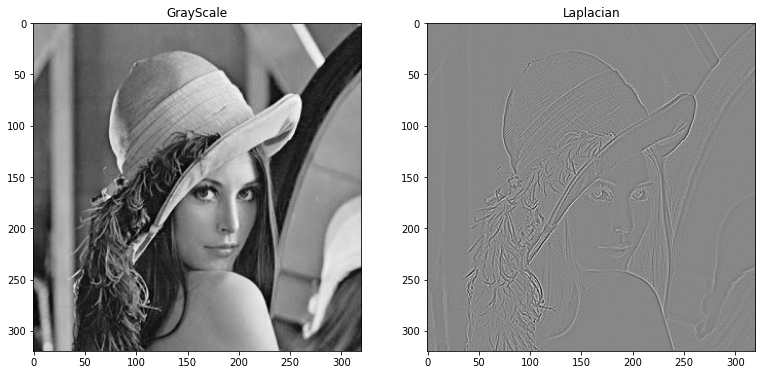

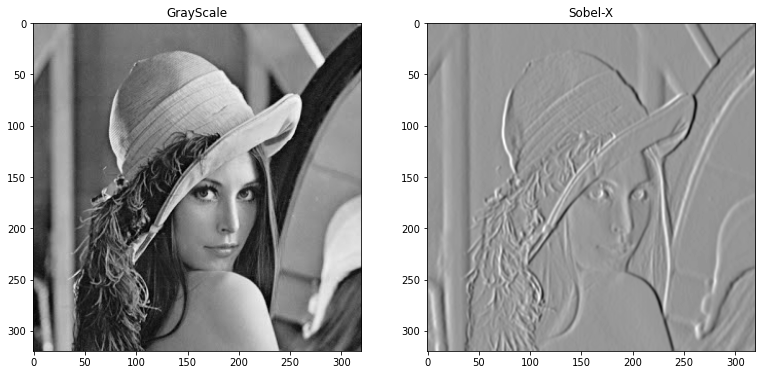

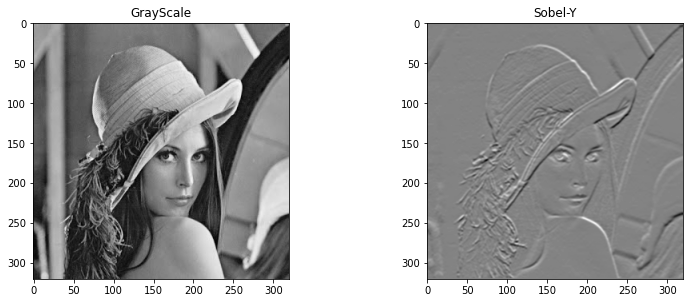

In [13]:
img = io.imread("../inputs/image.jpg",1) #in skimage 1 is for grayscale
compute_gradients(img,laplacian,sobelX,sobelY)

### Canny Edge Detector <a name="canny"></a>

Canny Edge Detection is a popular multi-stage edge detection algorithm. Lets have a look at opencv version of an example image.

OpenCV puts this multistage algorithm in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude.

Text(0.5, 1.0, 'Canny edge detector')

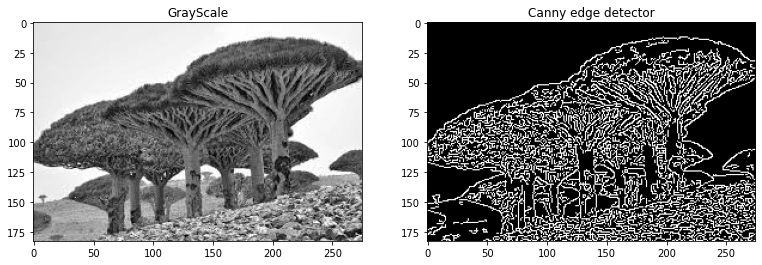

In [14]:
img = cv2.imread("../inputs/image2.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")

### Difference of Gaussian <a name="dog"></a>

Lets see an example of Gaussian smooting at different scales (it is recommended to look at gaussian smoothing in previous notebook).

In Gaussian Blurring, we discussed how the standard deviation of the Gaussian affects the degree of smoothing. Roughly speaking, larger the standard deviation more will be the blurring

Text(0.5, 1.0, 'Gaussian Filter, sigma=1')

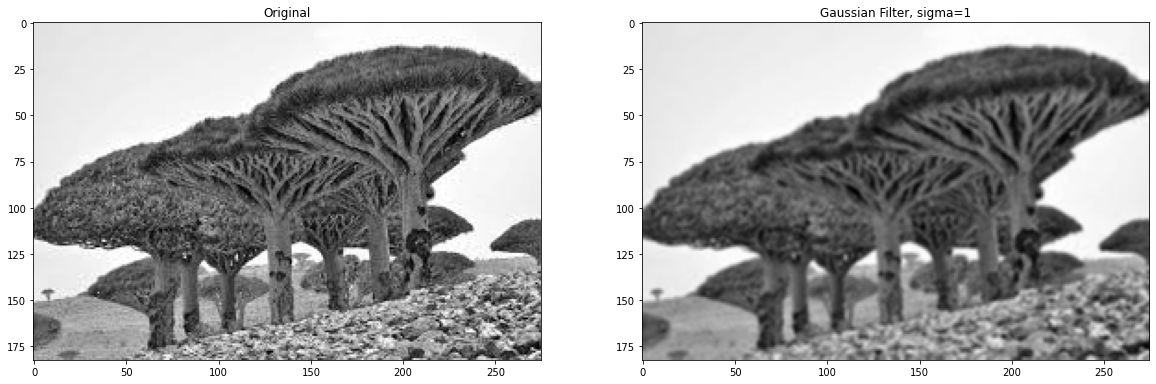

In [15]:
img = cv2.imread("../inputs/image2.jpg",0)
img_gaussianFilter = cv2.GaussianBlur(img, (3,3),sigmaX=1)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=1")

Text(0.5, 1.0, 'Gaussian Filter, sigma=5')

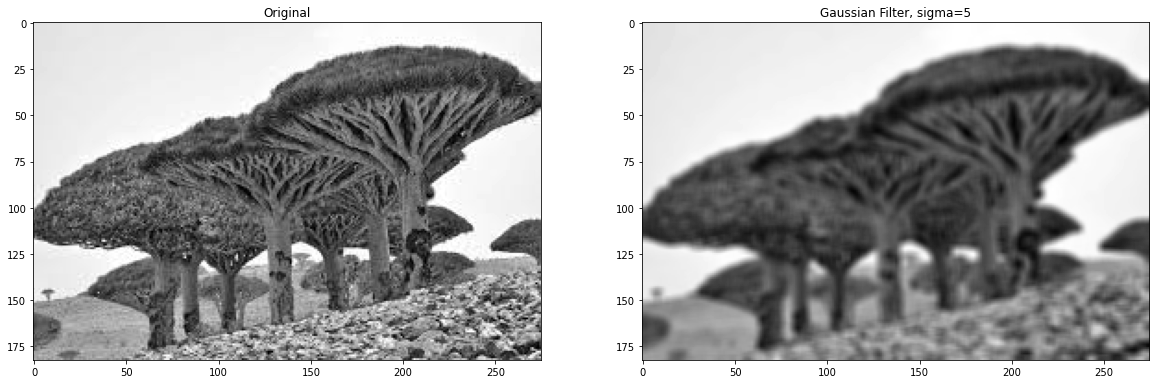

In [16]:
img = cv2.imread("../inputs/image2.jpg",0)
img_gaussianFilter = cv2.GaussianBlur(img, (5,5),sigmaX=3)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=5")

Text(0.5, 1.0, 'Gaussian Filter, sigma=10')

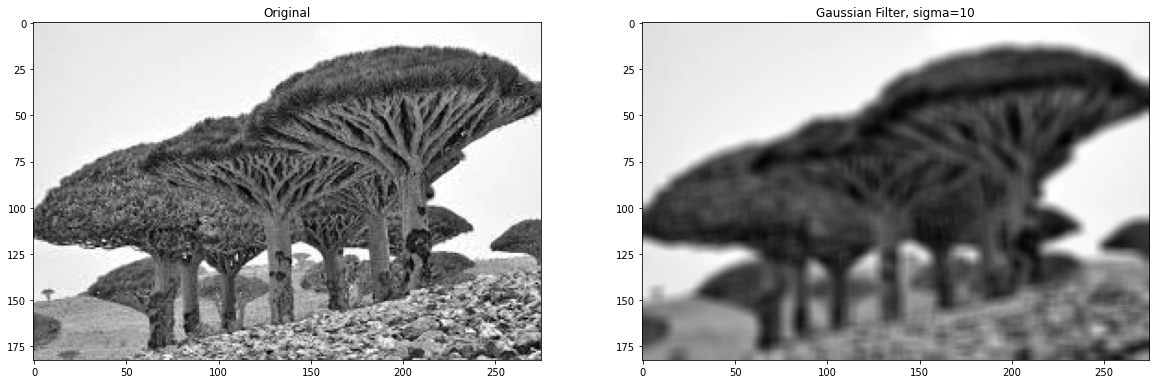

In [17]:
img = cv2.imread("../inputs/image2.jpg",0)
img_gaussianFilter = cv2.GaussianBlur(img, (7,7),sigmaX=10)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=10")


**DoG**: if we take 2 Gaussian kernels with different standard deviations, apply separately on the same image and subtract their corresponding responses, we will get an output that highlights certain high-frequency components based on the standard deviations used. All the remaining frequency components are assumed to be associated with the edges in the images.

Text(0.5, 1.0, 'Difference of Gaussian')

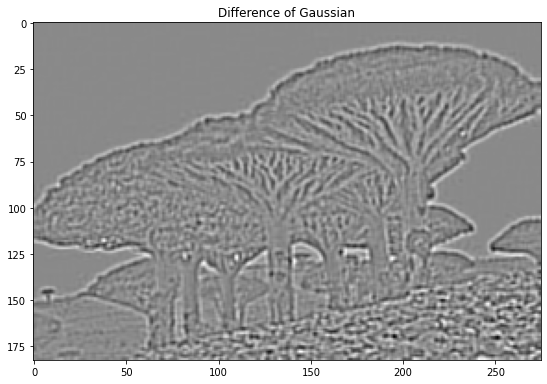

In [18]:
new_img = io.imread("../inputs/image2.jpg",1)

low_sigma = cv2.GaussianBlur(new_img,(3,3),1)
high_sigma = cv2.GaussianBlur(new_img,(5,5),8)
 
# Calculate the DoG by subtracting
dog = low_sigma - high_sigma

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(dog,cmap=plt.cm.gray)
plt.title("Difference of Gaussian")

DoG with various Sigma Values

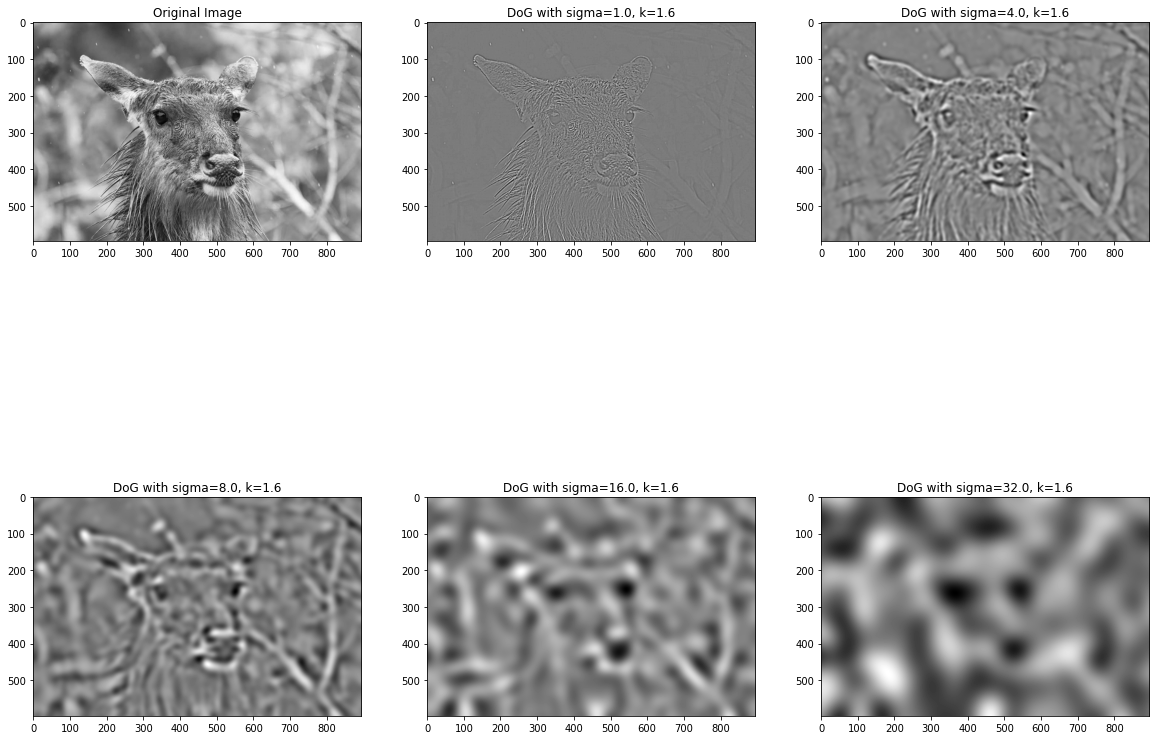

In [19]:
from skimage import data, feature, color, filters, img_as_float
from matplotlib import pyplot as plt


img = io.imread("../inputs/image3.jpg",1)

k = 1.6 #multplier for sigmas

plt.subplot(2,3,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original Image")

#show DoGs with variant sigmas
for idx,sigma in enumerate([1.0,4.0,8.0,16.0,32.0]):
    s1 = filters.gaussian(img,k*sigma) #higher sigma
    s2 = filters.gaussian(img,sigma) #lower sigma

    # multiply by sigma to get scale invariance
    dog = s2 - s1
    plt.subplot(2,3,idx+2)
    plt.imshow(dog,cmap=plt.cm.gray)
    plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

plt.show()

### Blob Detection <a name="blob"></a>

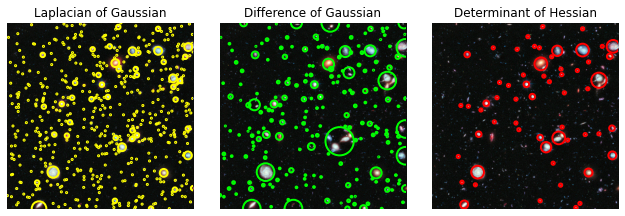

In [20]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]

image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()